In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
air_quality = pd.read_csv('data/air_quality_no2_long.csv')
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [52]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [53]:
air_quality.datetime = pd.to_datetime(air_quality.datetime)
air_quality.datetime.head()

0   2019-06-21 00:00:00+00:00
1   2019-06-20 23:00:00+00:00
2   2019-06-20 22:00:00+00:00
3   2019-06-20 21:00:00+00:00
4   2019-06-20 20:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]

In [54]:
print(air_quality.datetime.min())
print(air_quality.datetime.max())
print(air_quality.datetime.max() - air_quality.datetime.min())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00
44 days 23:00:00


In [55]:
air_quality['month'] = air_quality['datetime'].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [56]:
air_quality.groupby(['month', 'location'])['value'].mean()

month  location          
5      BETR801               24.344156
       FR04014               27.908446
       London Westminster    28.158433
6      BETR801               31.916667
       FR04014               27.499272
       London Westminster    19.581152
Name: value, dtype: float64

Text(0, 0.5, '$NO_2 (µg/m^3)$')

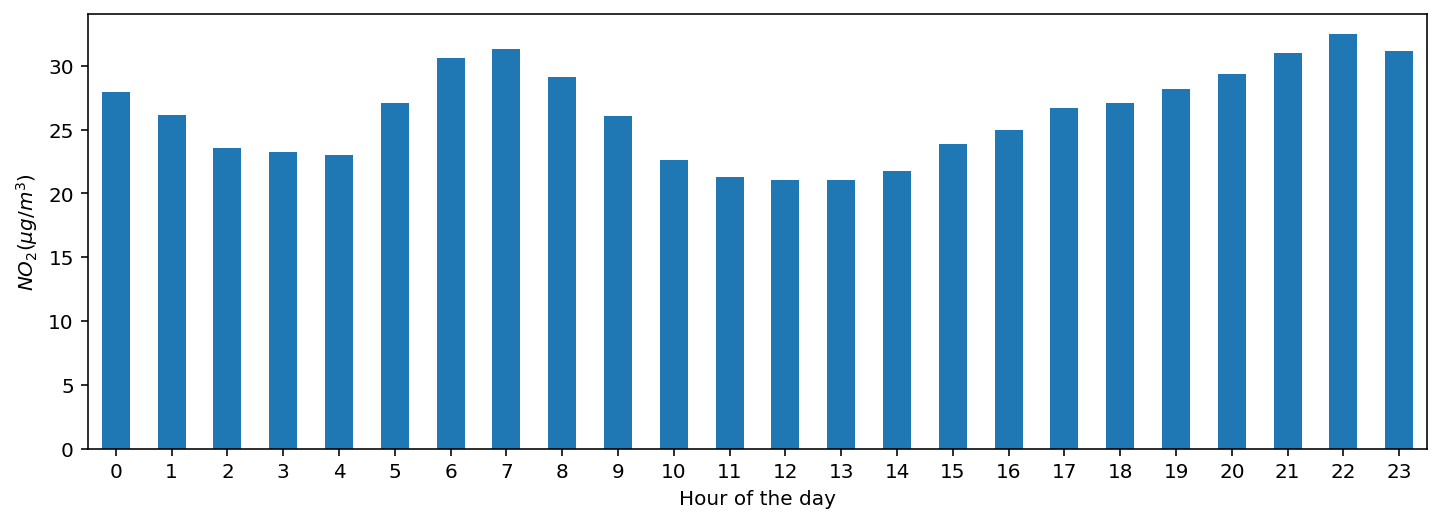

In [57]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby([air_quality['datetime'].dt.hour])['value'].mean().plot(kind="bar", rot=0)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$")

In [58]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [60]:
no_2.index.weekday, no_2.index.year

(Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033),
 Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033))

<AxesSubplot:xlabel='datetime'>

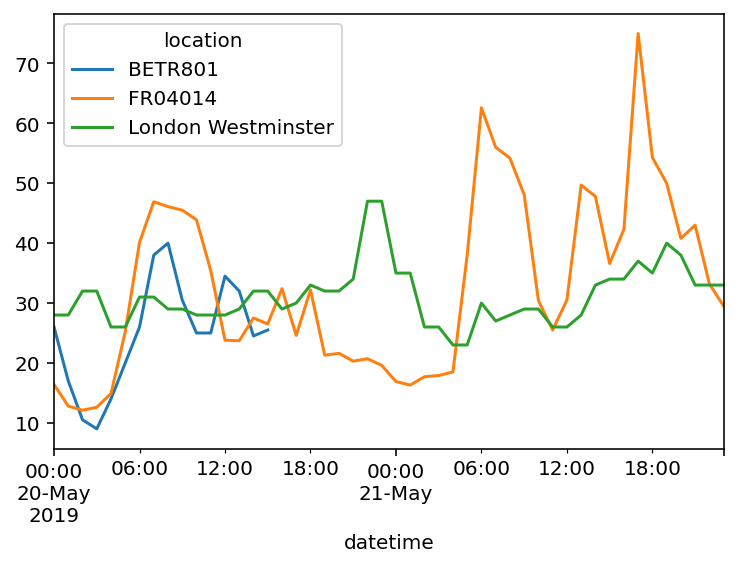

In [61]:
no_2["2019-05-20":"2019-05-21"].plot()

In [62]:
monthly_max = no_2.resample("M").max()
monthly_max.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [63]:
monthly_max.index.freq

<MonthEnd>

<AxesSubplot:xlabel='datetime'>

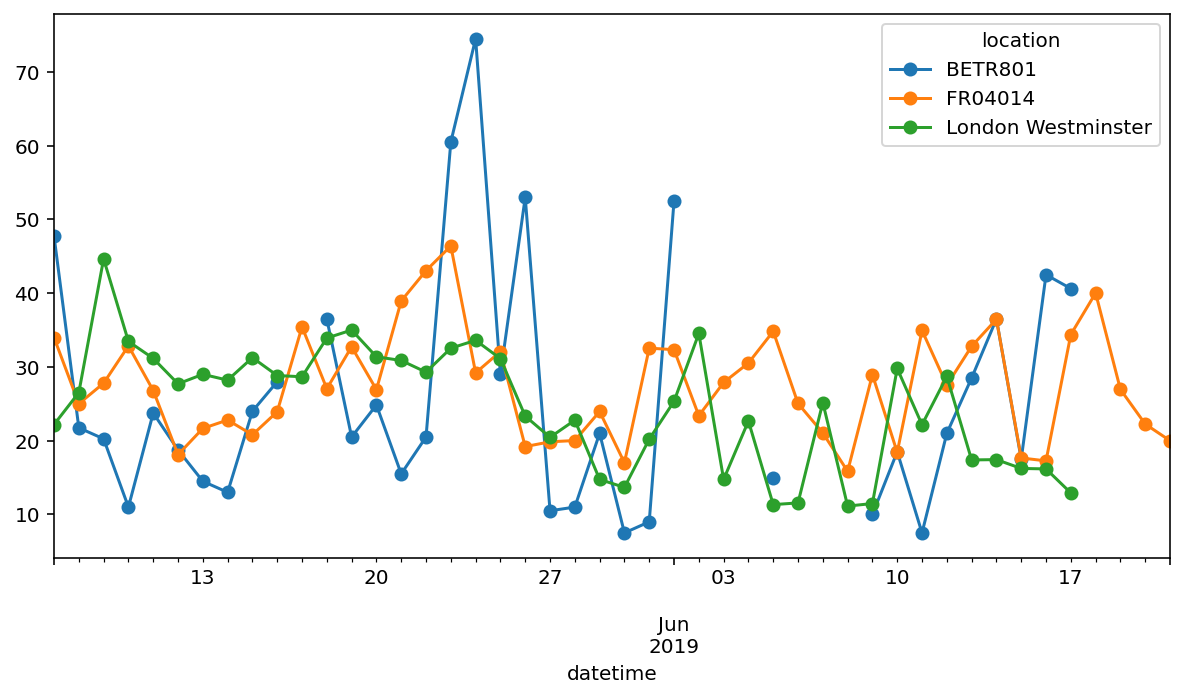

In [64]:
no_2.resample('D').mean().plot(style="-o", figsize=(10, 5))